# <center>Time Series Forecasting of Electricity Prices of a District</center>
### <center>by</center>
## <center>Shedrack David</center>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from prophet import Prophet
from prophet.plot import plot_plotly
%matplotlib inline

# Set the style to use
sns.set_style("dark")

# Set the color palette to use
colors = ["#48A9A6", "#071010", "#000000"]
sns.set_palette(sns.color_palette(colors))


In [2]:
#load dataset
df = pd.read_csv('Time_series_analysis_and_forecast_DATASET (1).csv')


In [3]:
df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [4]:
df.tail()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
92011,2021-02-28 19:00:00,24.3,449.63625,5.4848,117.925
92012,2021-02-28 20:00:00,24.3,815.59975,5.4848,87.880
92013,2021-02-28 21:00:00,24.3,745.12325,5.4848,62.060
92014,2021-02-28 22:00:00,24.3,694.95150,5.4848,62.000
92015,2021-02-28 23:00:00,24.3,714.69630,5.4848,62.955


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FullDate   92016 non-null  object 
 1   Tmax       92016 non-null  float64
 2   SysLoad    92016 non-null  float64
 3   GasPrice   92016 non-null  float64
 4   ElecPrice  92016 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.5+ MB


In [6]:
#set date time format
df['FullDate'] = pd.to_datetime(df['FullDate'], format='%Y-%m-%d')

In [7]:
df.isna().sum()

FullDate     0
Tmax         0
SysLoad      0
GasPrice     0
ElecPrice    0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.21500,3.6900,23.710
1,2010-09-01 01:00:00,15.8,1669.19500,3.6900,22.635
2,2010-09-01 02:00:00,15.8,1491.98000,3.6900,22.565
3,2010-09-01 03:00:00,15.8,1330.76000,3.6900,18.910
4,2010-09-01 04:00:00,15.8,1247.94000,3.6900,18.030
...,...,...,...,...,...
92011,2021-02-28 19:00:00,24.3,449.63625,5.4848,117.925
92012,2021-02-28 20:00:00,24.3,815.59975,5.4848,87.880
92013,2021-02-28 21:00:00,24.3,745.12325,5.4848,62.060
92014,2021-02-28 22:00:00,24.3,694.95150,5.4848,62.000


In [10]:
df_copy = df.copy()

In [11]:
df_copy.set_index(df_copy['FullDate'], inplace=True)

In [12]:
#resampling data to monthly average
avg_yr = df_copy[['Tmax', 'SysLoad', 'GasPrice', 'ElecPrice']].resample('M').mean()

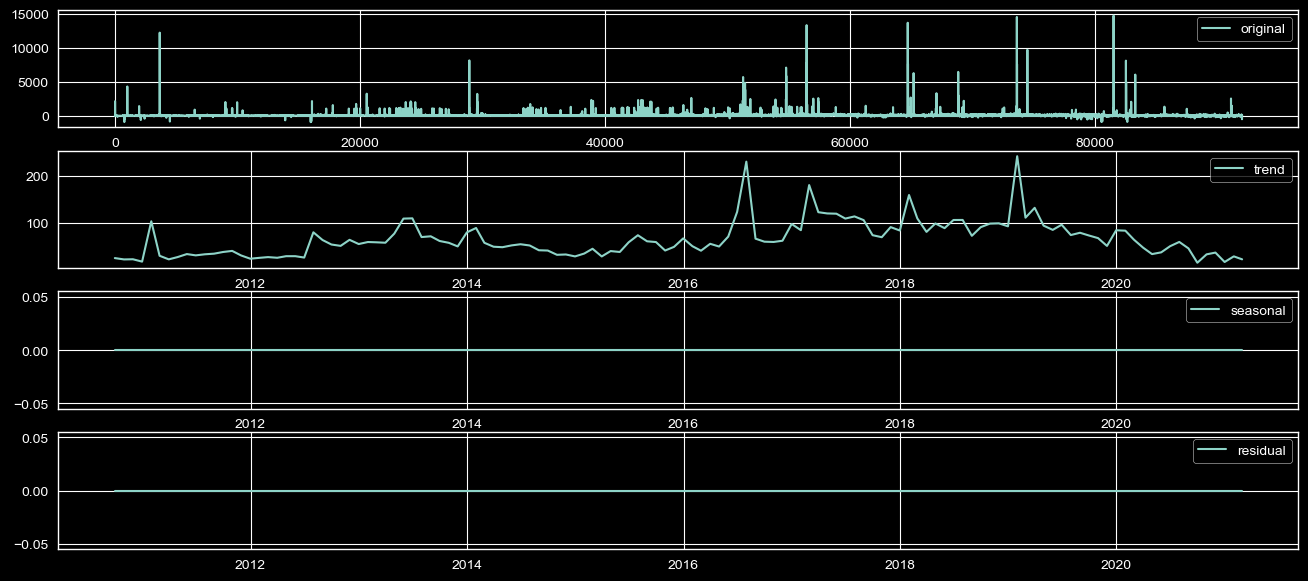

In [19]:
#decompose data using aadditive model with 1 period or frequency
from statsmodels.tsa.seasonal import seasonal_decompose
dec = seasonal_decompose(avg_yr['ElecPrice'], period=1, model='additive')
trend = dec.trend
season = dec.seasonal
residual = dec.resid

plt.figure(figsize=(16,7))
plt.subplot(411)
plt.plot(df['ElecPrice'], label='original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(season, label='seasonal')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='residual')
plt.legend(loc='best')


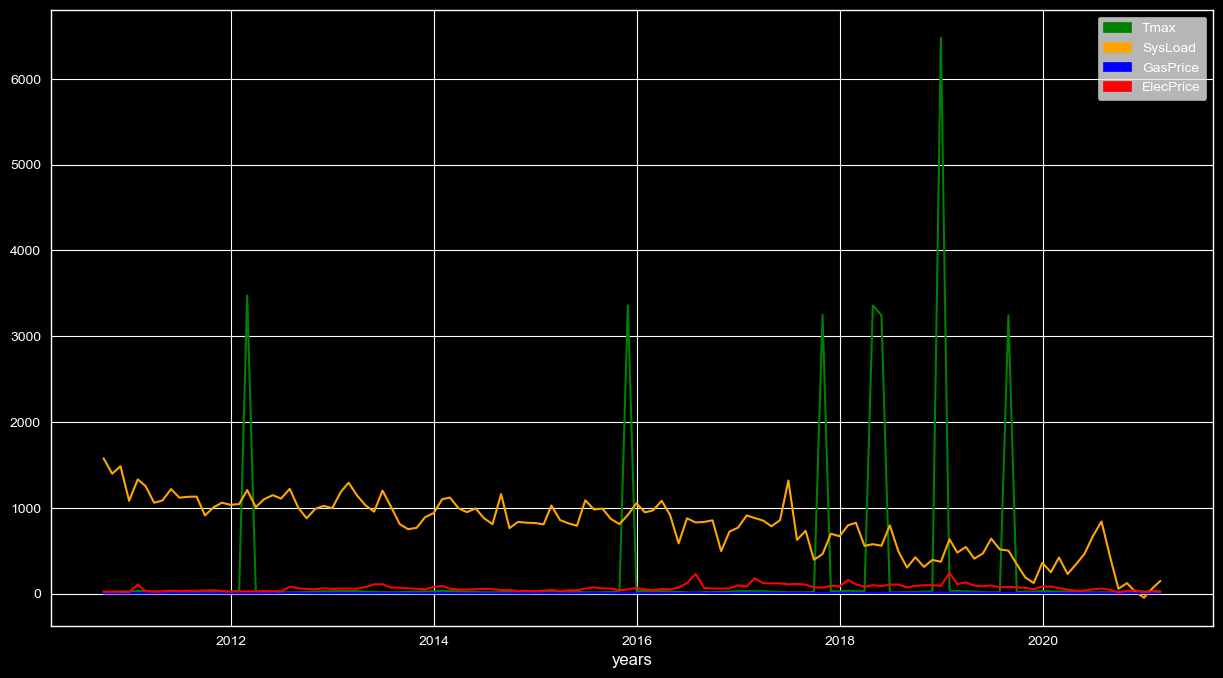

In [20]:
plt.figure(figsize=(15,8))
plt.xlabel('years')
plt.style.use('dark_background')
plt.plot(avg_yr.index, avg_yr['Tmax'], color='g')
plt.plot(avg_yr.index, avg_yr['SysLoad'], color='orange')
plt.plot(avg_yr.index, avg_yr['GasPrice'], color='b')
plt.plot(avg_yr.index, avg_yr['ElecPrice'], color='r')
plt.style.use('ggplot')

TM = mpatches.Patch(color='g', label='Tmax')
SL = mpatches.Patch(color='orange', label='SysLoad')
GS = mpatches.Patch(color='b', label='GasPrice')
EP = mpatches.Patch(color='r', label='ElecPrice')
plt.legend(handles=[TM, SL, GS, EP]);

In [21]:
#reasmpling data into weeks
avg_yr = df_copy[['ElecPrice']].resample('W').mean()

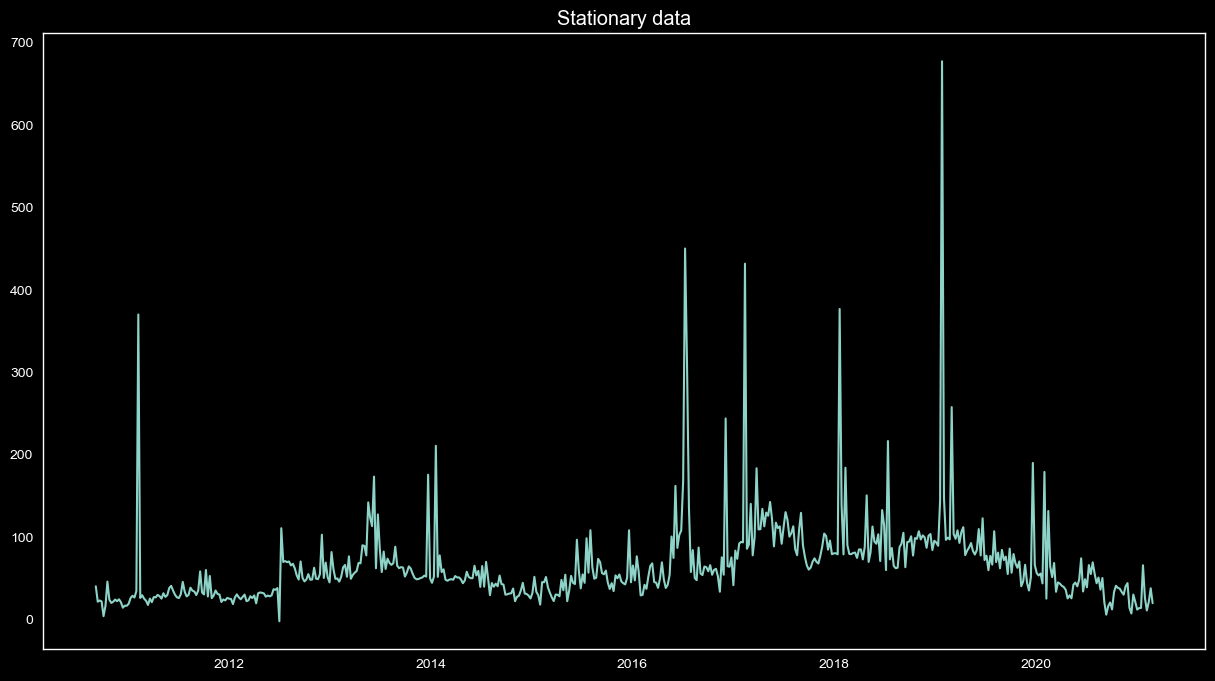

In [22]:
#checking if the data is stationary
plt.style.use('dark_background')
dif = pd.DataFrame(avg_yr['ElecPrice'] )
plt.figure(figsize=(15,8))
plt.title('Stationary data')
plt.plot(dif)
plt.grid(visible=False)
plt.style.use('ggplot')

In [74]:
from statsmodels.tsa.stattools import adfuller
#function to check stationarity using Augmented Dickey fuller test 

ADF = adfuller(avg_yr['ElecPrice'], autolag='AIC')
print(f'ADF statistics for Electric Price is: {ADF[0]}')
print(f'p-Value: {ADF[1]}')
for key, value in ADF[4].items():
    print('critical values: ')
    print(f'    {key},  {value}')

ADF statistics for Electric Price is: -5.096948057166283
p-Value: 1.4218449622644363e-05
critical values: 
    1%,  -3.442472769145813
critical values: 
    5%,  -2.8668873212324817
critical values: 
    10%,  -2.5696179384812297


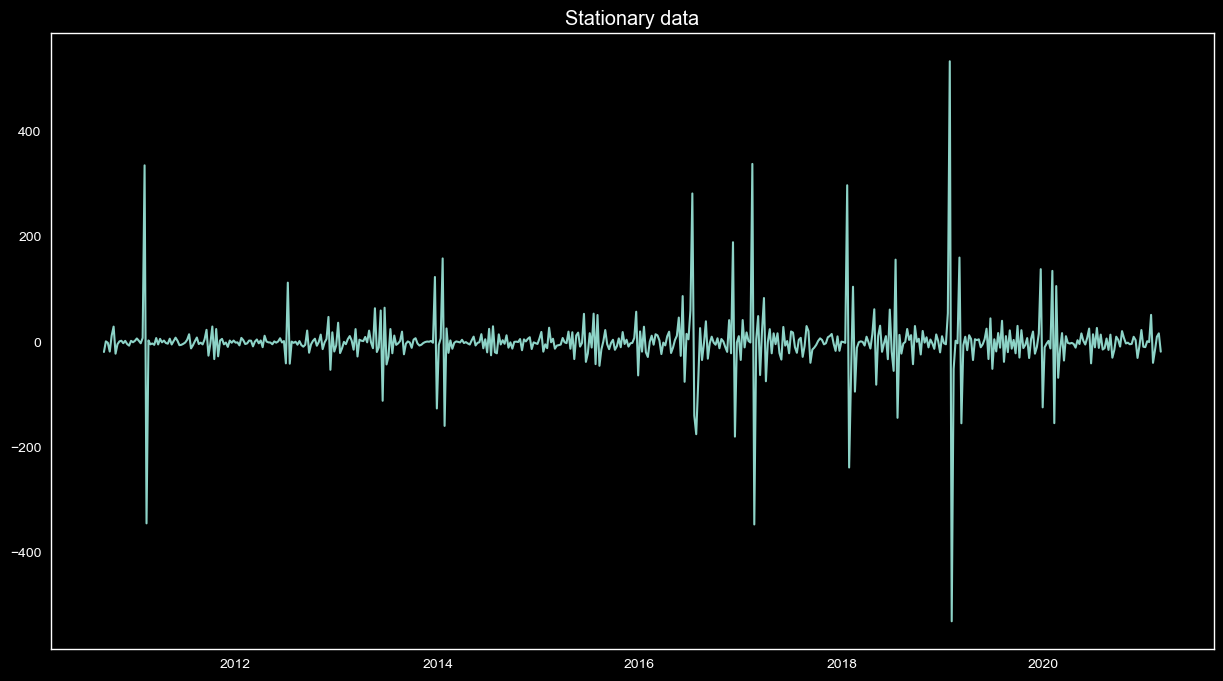

In [75]:
# attempting differenceing on the data
plt.style.use('dark_background')
dif = pd.DataFrame(avg_yr['ElecPrice'] - avg_yr['ElecPrice'].shift(1))
plt.figure(figsize=(15,8))
plt.title('Stationary data')
plt.plot(dif)
plt.grid(visible=False)
plt.style.use('ggplot')

In [76]:
ADF = adfuller(avg_yr['ElecPrice'], autolag='AIC')
print(f'ADF statistics for Electric Price is: {ADF[0]}')
print(f'p-Value: {ADF[1]}')
for key, value in ADF[4].items():
    print('critical values: ')
    print(f'    {key},  {value}')

ADF statistics for Electric Price is: -5.096948057166283
p-Value: 1.4218449622644363e-05
critical values: 
    1%,  -3.442472769145813
critical values: 
    5%,  -2.8668873212324817
critical values: 
    10%,  -2.5696179384812297


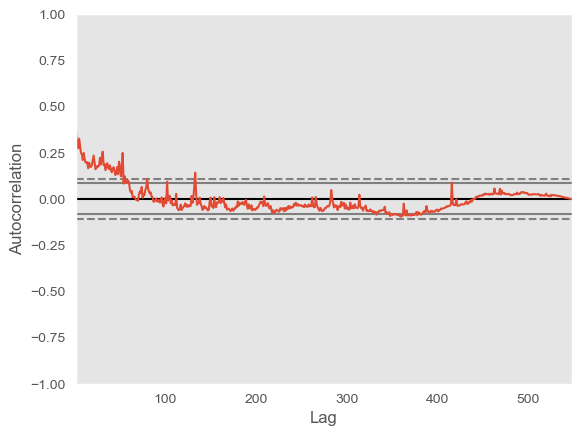

In [77]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(avg_yr['ElecPrice'])
plt.show()

In [78]:
avg_yr

,ElecPrice
FullDate,
2010-09-05,40.252625
2010-09-12,21.586905
2010-09-19,23.034405
2010-09-26,21.849940
2010-10-03,4.022173
...,...
2021-01-31,26.511548
2021-02-07,10.917113
2021-02-14,21.182530


In [119]:
#spliting data into training and test set
train = avg_yr[avg_yr.index <= "2019-01-01"]
test = avg_yr[avg_yr.index >= "2019-01-01"]

In [120]:
train = train.reset_index()
test = test.reset_index()

In [121]:
train.columns = ['ds', 'y']
test.columns = ['ds', 'y']

In [122]:
train.head()

,ds,y
0,2010-09-05,40.252625
1,2010-09-12,21.586905
2,2010-09-19,23.034405
3,2010-09-26,21.849940
4,2010-10-03,4.022173


In [123]:
m = Prophet()
m = m.fit(train)

10:26:48 - cmdstanpy - INFO - Chain [1] start processing
10:26:48 - cmdstanpy - INFO - Chain [1] done processing


In [124]:
forecast = m.predict(test)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-06,109.416847,50.160992,155.985769,109.416847,109.416847,-7.566917,-7.566917,-7.566917,-7.566917,-7.566917,-7.566917,0.0,0.0,0.0,101.849931
1,2019-01-13,109.646540,58.590456,164.943624,109.646540,109.646540,0.987135,0.987135,0.987135,0.987135,0.987135,0.987135,0.0,0.0,0.0,110.633676
2,2019-01-20,109.876233,61.640711,174.056565,109.876233,109.876233,10.298957,10.298957,10.298957,10.298957,10.298957,10.298957,0.0,0.0,0.0,120.175190
3,2019-01-27,110.105926,77.961650,178.806918,110.104839,110.105926,19.198456,19.198456,19.198456,19.198456,19.198456,19.198456,0.0,0.0,0.0,129.304382
4,2019-02-03,110.335619,83.778753,192.717647,110.332997,110.336629,25.444943,25.444943,25.444943,25.444943,25.444943,25.444943,0.0,0.0,0.0,135.780562


In [125]:
forecast[['ds', 'yhat']]  

,ds,yhat
0,2019-01-06,101.849931
1,2019-01-13,110.633676
2,2019-01-20,120.175190
3,2019-01-27,129.304382
4,2019-02-03,135.780562
...,...,...
108,2021-01-31,157.995838
109,2021-02-07,160.481559
110,2021-02-14,153.804431
111,2021-02-21,139.527082


In [126]:
future = m.make_future_dataframe(periods=len(test), freq='W-SUN',include_history=False)
fore_fu = m.predict(future)

In [127]:
fore_fu

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-06,109.416847,48.935459,154.263108,109.416847,109.416847,-7.566917,-7.566917,-7.566917,-7.566917,-7.566917,-7.566917,0.0,0.0,0.0,101.849931
1,2019-01-13,109.646540,54.391234,160.190297,109.646540,109.646540,0.987135,0.987135,0.987135,0.987135,0.987135,0.987135,0.0,0.0,0.0,110.633676
2,2019-01-20,109.876233,62.977324,172.294538,109.876233,109.876233,10.298957,10.298957,10.298957,10.298957,10.298957,10.298957,0.0,0.0,0.0,120.175190
3,2019-01-27,110.105926,77.410793,181.383393,110.105926,110.106561,19.198456,19.198456,19.198456,19.198456,19.198456,19.198456,0.0,0.0,0.0,129.304382
4,2019-02-03,110.335619,86.628576,194.120602,110.335236,110.337505,25.444943,25.444943,25.444943,25.444943,25.444943,25.444943,0.0,0.0,0.0,135.780562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,2021-01-31,134.223681,105.993411,211.385121,133.144771,135.218452,23.772157,23.772157,23.772157,23.772157,23.772157,23.772157,0.0,0.0,0.0,157.995838
109,2021-02-07,134.453374,107.418405,214.643772,133.357442,135.458730,26.028185,26.028185,26.028185,26.028185,26.028185,26.028185,0.0,0.0,0.0,160.481559
110,2021-02-14,134.683067,100.416290,206.677370,133.561750,135.693922,19.121364,19.121364,19.121364,19.121364,19.121364,19.121364,0.0,0.0,0.0,153.804431
111,2021-02-21,134.912760,88.951009,192.997257,133.779161,135.941046,4.614322,4.614322,4.614322,4.614322,4.614322,4.614322,0.0,0.0,0.0,139.527082


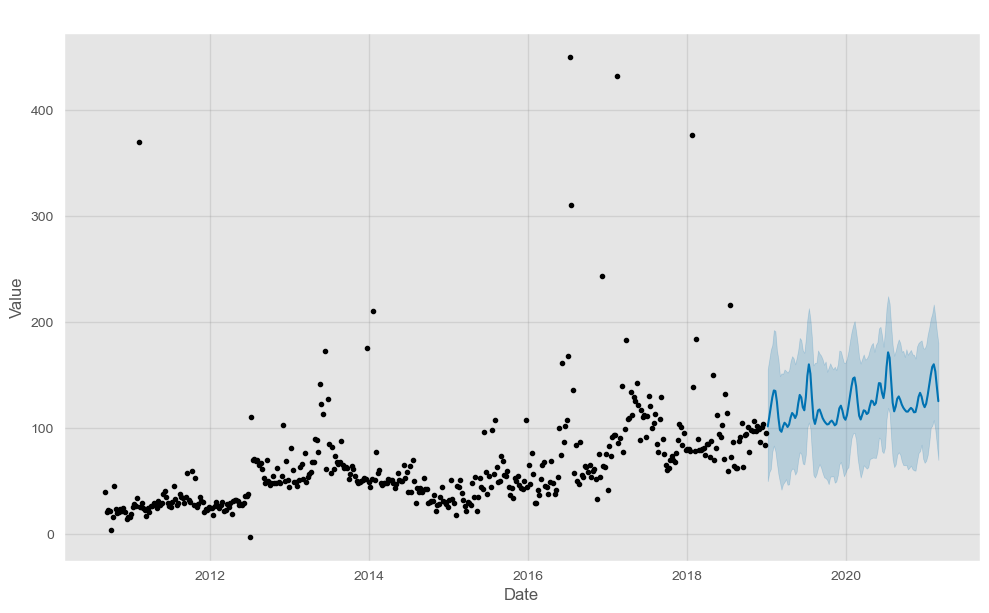

In [128]:
# Plot the actual and predicted values
fig = m.plot(forecast)
plt.title('Actual vs. Predicted Values')
plt.xlabel('Date')
plt.ylabel('Value')

plt.show()



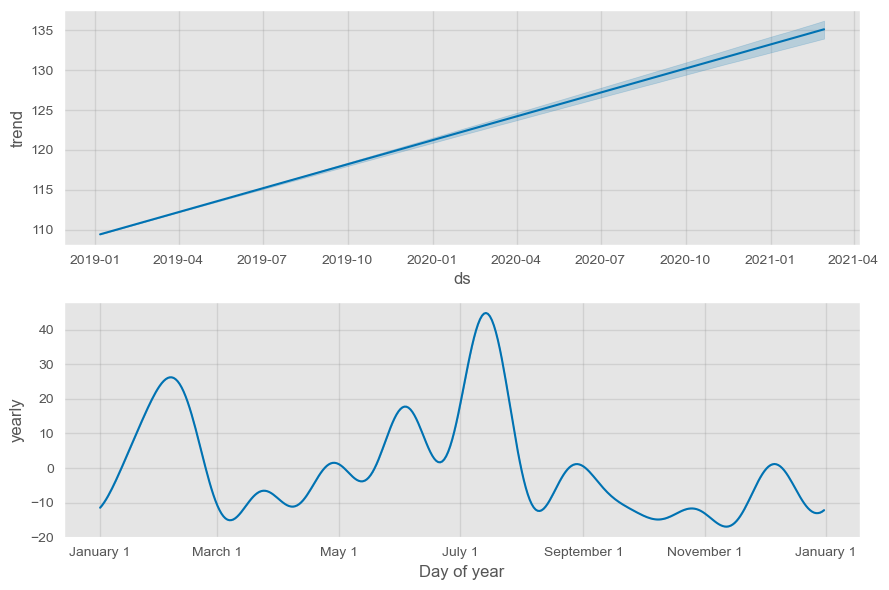

In [129]:
# Plot the forecast components

fig = m.plot_components(forecast)
plt.style.use('ggplot')
plt.show()


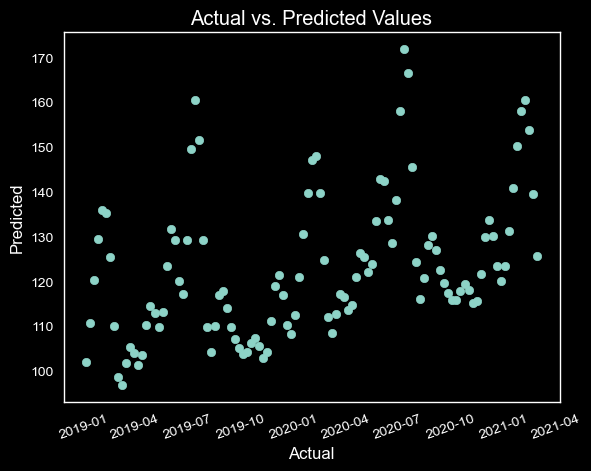

In [130]:
# Create a scatterplot of actual vs. predicted values
plt.style.use('dark_background')
plt.scatter(forecast['ds'], forecast['yhat'])
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.style.use('ggplot')
plt.xticks(rotation=20)
plt.grid(visible=False)
plt.show()


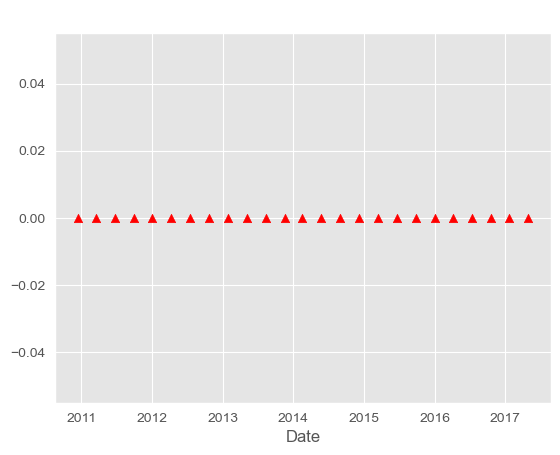

In [131]:
# Get the changepoints
changepoints = m.changepoints

# Plot the changepoints
plt.scatter(changepoints, [0]*len(changepoints), marker='^', color='r')
plt.title('Changepoints')
plt.xlabel('Date')
plt.show()


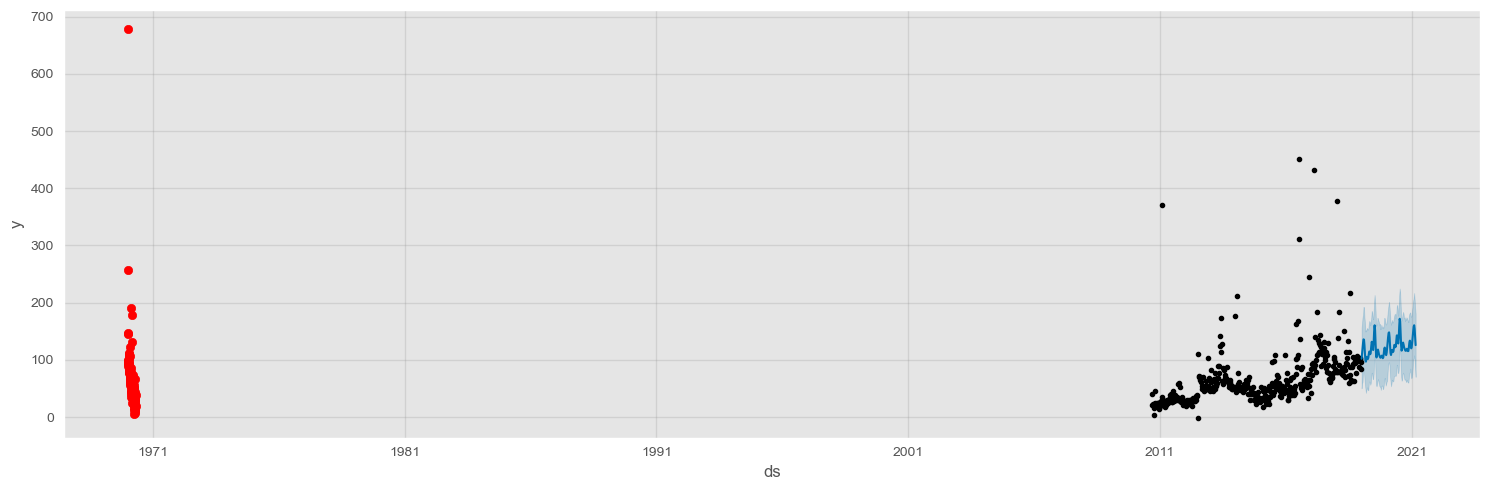

In [132]:
f, ax = plt.subplots(figsize=(15, 5))
ax.scatter(test.index, test['y'], color='r')
fig = m.plot(forecast, ax=ax)

In [133]:
from sklearn.metrics import mean_absolute_error
#mean absolute errorS
mae = mean_absolute_error(test['y'], forecast['yhat'])
print(mae)

70.8170458618495


In [134]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(test['y'], forecast['yhat'])
print(mape)


223.1740025138592


In [135]:
#root mean squared error
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['y'], forecast['yhat']))
print(rmse)

91.5074165305975


In [136]:
#r-squared
from sklearn.metrics import r2_score
r2 = r2_score(test['y'], forecast['yhat'])
print(r2)

-0.7275667599946598


In [137]:
fs=pd.Series(forecast["yhat"])
fs.index=forecast.ds